In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import datetime
%matplotlib notebook

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
now = datetime.datetime.now()

# Generate Cities List

In [10]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

# Perform API Calls
Perform a weather check on each city using a series of successive API calls.
Include a print log of each city as it'sbeing processed (with the city number and city name).

In [11]:
#Creating base URL and empty dataframe
url = f'https://api.openweathermap.org/data/2.5/weather?APPID={api_key}&units=imperial&q='
data_df = pd.DataFrame({'City':[],
                        'Cloudiness':[],
                        'Country':[],
                        'Date':[],
                        'Humidity':[],
                        'Lat':[],
                        'Lng':[],
                        'Max_temp':[],
                        'Wind_speed':[]
                       })

In [12]:
#API request for each city and populating dataframe in the same loop
i = 0
for city in cities:    
    response_req = requests.get(url+city)
    response = response_req.json()

    if (response['cod'] == 200):
        i = i+1
        print(f'Processing Record {i} | {city}')
        print(response_req.url)

        data_df.loc[i,'City'] = city
        data_df.loc[i,'Cloudiness'] = response['clouds']['all']
        data_df.loc[i,'Country'] = response['sys']['country']
        data_df.loc[i,'Date'] = now.strftime("%Y-%m-%d") 
        data_df.loc[i,'Humidity'] = response['main']['humidity']
        data_df.loc[i,'Lat'] = response['coord']['lat']
        data_df.loc[i,'Lng'] = response['coord']['lon']
        data_df.loc[i,'Max_temp'] = response['main']['temp_max']
        data_df.loc[i,'Wind_speed'] = response['wind']['speed']
    else:
        print('City not found. Skipping')
            
print("-----------------------------")
print("Data Retrieval Complete")      
print("-----------------------------")

Processing Record 1 | liuli
https://api.openweathermap.org/data/2.5/weather?APPID=902fd8ce3c581e31b7de43156a4b2fda&units=imperial&q=liuli
Processing Record 2 | punta arenas
https://api.openweathermap.org/data/2.5/weather?APPID=902fd8ce3c581e31b7de43156a4b2fda&units=imperial&q=punta%20arenas
Processing Record 3 | tuktoyaktuk
https://api.openweathermap.org/data/2.5/weather?APPID=902fd8ce3c581e31b7de43156a4b2fda&units=imperial&q=tuktoyaktuk
Processing Record 4 | bluff
https://api.openweathermap.org/data/2.5/weather?APPID=902fd8ce3c581e31b7de43156a4b2fda&units=imperial&q=bluff
Processing Record 5 | antalaha
https://api.openweathermap.org/data/2.5/weather?APPID=902fd8ce3c581e31b7de43156a4b2fda&units=imperial&q=antalaha
Processing Record 6 | yulara
https://api.openweathermap.org/data/2.5/weather?APPID=902fd8ce3c581e31b7de43156a4b2fda&units=imperial&q=yulara
City not found. Skipping
Processing Record 7 | qaanaaq
https://api.openweathermap.org/data/2.5/weather?APPID=902fd8ce3c581e31b7de43156a4

Processing Record 56 | puerto ayora
https://api.openweathermap.org/data/2.5/weather?APPID=902fd8ce3c581e31b7de43156a4b2fda&units=imperial&q=puerto%20ayora
Processing Record 57 | provideniya
https://api.openweathermap.org/data/2.5/weather?APPID=902fd8ce3c581e31b7de43156a4b2fda&units=imperial&q=provideniya
Processing Record 58 | berlevag
https://api.openweathermap.org/data/2.5/weather?APPID=902fd8ce3c581e31b7de43156a4b2fda&units=imperial&q=berlevag
Processing Record 59 | waingapu
https://api.openweathermap.org/data/2.5/weather?APPID=902fd8ce3c581e31b7de43156a4b2fda&units=imperial&q=waingapu
Processing Record 60 | hami
https://api.openweathermap.org/data/2.5/weather?APPID=902fd8ce3c581e31b7de43156a4b2fda&units=imperial&q=hami
Processing Record 61 | vaini
https://api.openweathermap.org/data/2.5/weather?APPID=902fd8ce3c581e31b7de43156a4b2fda&units=imperial&q=vaini
Processing Record 62 | ugoofaaru
https://api.openweathermap.org/data/2.5/weather?APPID=902fd8ce3c581e31b7de43156a4b2fda&units=im

Processing Record 112 | sassandra
https://api.openweathermap.org/data/2.5/weather?APPID=902fd8ce3c581e31b7de43156a4b2fda&units=imperial&q=sassandra
Processing Record 113 | lower hutt
https://api.openweathermap.org/data/2.5/weather?APPID=902fd8ce3c581e31b7de43156a4b2fda&units=imperial&q=lower%20hutt
Processing Record 114 | kahului
https://api.openweathermap.org/data/2.5/weather?APPID=902fd8ce3c581e31b7de43156a4b2fda&units=imperial&q=kahului
Processing Record 115 | dzilam gonzalez
https://api.openweathermap.org/data/2.5/weather?APPID=902fd8ce3c581e31b7de43156a4b2fda&units=imperial&q=dzilam%20gonzalez
Processing Record 116 | basco
https://api.openweathermap.org/data/2.5/weather?APPID=902fd8ce3c581e31b7de43156a4b2fda&units=imperial&q=basco
Processing Record 117 | bathsheba
https://api.openweathermap.org/data/2.5/weather?APPID=902fd8ce3c581e31b7de43156a4b2fda&units=imperial&q=bathsheba
City not found. Skipping
Processing Record 118 | plettenberg bay
https://api.openweathermap.org/data/2.5/w

Processing Record 167 | mar del plata
https://api.openweathermap.org/data/2.5/weather?APPID=902fd8ce3c581e31b7de43156a4b2fda&units=imperial&q=mar%20del%20plata
Processing Record 168 | hay river
https://api.openweathermap.org/data/2.5/weather?APPID=902fd8ce3c581e31b7de43156a4b2fda&units=imperial&q=hay%20river
Processing Record 169 | taoudenni
https://api.openweathermap.org/data/2.5/weather?APPID=902fd8ce3c581e31b7de43156a4b2fda&units=imperial&q=taoudenni
Processing Record 170 | tayoltita
https://api.openweathermap.org/data/2.5/weather?APPID=902fd8ce3c581e31b7de43156a4b2fda&units=imperial&q=tayoltita
Processing Record 171 | vanimo
https://api.openweathermap.org/data/2.5/weather?APPID=902fd8ce3c581e31b7de43156a4b2fda&units=imperial&q=vanimo
Processing Record 172 | santiago del estero
https://api.openweathermap.org/data/2.5/weather?APPID=902fd8ce3c581e31b7de43156a4b2fda&units=imperial&q=santiago%20del%20estero
City not found. Skipping
Processing Record 173 | sur
https://api.openweathermap.

Processing Record 222 | sao filipe
https://api.openweathermap.org/data/2.5/weather?APPID=902fd8ce3c581e31b7de43156a4b2fda&units=imperial&q=sao%20filipe
Processing Record 223 | katherine
https://api.openweathermap.org/data/2.5/weather?APPID=902fd8ce3c581e31b7de43156a4b2fda&units=imperial&q=katherine
City not found. Skipping
Processing Record 224 | jinchang
https://api.openweathermap.org/data/2.5/weather?APPID=902fd8ce3c581e31b7de43156a4b2fda&units=imperial&q=jinchang
Processing Record 225 | almaznyy
https://api.openweathermap.org/data/2.5/weather?APPID=902fd8ce3c581e31b7de43156a4b2fda&units=imperial&q=almaznyy
Processing Record 226 | mitsamiouli
https://api.openweathermap.org/data/2.5/weather?APPID=902fd8ce3c581e31b7de43156a4b2fda&units=imperial&q=mitsamiouli
Processing Record 227 | los llanos de aridane
https://api.openweathermap.org/data/2.5/weather?APPID=902fd8ce3c581e31b7de43156a4b2fda&units=imperial&q=los%20llanos%20de%20aridane
Processing Record 228 | sola
https://api.openweatherm

Processing Record 277 | manzil salim
https://api.openweathermap.org/data/2.5/weather?APPID=902fd8ce3c581e31b7de43156a4b2fda&units=imperial&q=manzil%20salim
Processing Record 278 | zhaotong
https://api.openweathermap.org/data/2.5/weather?APPID=902fd8ce3c581e31b7de43156a4b2fda&units=imperial&q=zhaotong
City not found. Skipping
Processing Record 279 | nanortalik
https://api.openweathermap.org/data/2.5/weather?APPID=902fd8ce3c581e31b7de43156a4b2fda&units=imperial&q=nanortalik
Processing Record 280 | davila
https://api.openweathermap.org/data/2.5/weather?APPID=902fd8ce3c581e31b7de43156a4b2fda&units=imperial&q=davila
Processing Record 281 | thanh hoa
https://api.openweathermap.org/data/2.5/weather?APPID=902fd8ce3c581e31b7de43156a4b2fda&units=imperial&q=thanh%20hoa
Processing Record 282 | nipawin
https://api.openweathermap.org/data/2.5/weather?APPID=902fd8ce3c581e31b7de43156a4b2fda&units=imperial&q=nipawin
Processing Record 283 | saint george
https://api.openweathermap.org/data/2.5/weather?AP

Processing Record 331 | heiligenhafen
https://api.openweathermap.org/data/2.5/weather?APPID=902fd8ce3c581e31b7de43156a4b2fda&units=imperial&q=heiligenhafen
Processing Record 332 | alice springs
https://api.openweathermap.org/data/2.5/weather?APPID=902fd8ce3c581e31b7de43156a4b2fda&units=imperial&q=alice%20springs
Processing Record 333 | touros
https://api.openweathermap.org/data/2.5/weather?APPID=902fd8ce3c581e31b7de43156a4b2fda&units=imperial&q=touros
Processing Record 334 | ippy
https://api.openweathermap.org/data/2.5/weather?APPID=902fd8ce3c581e31b7de43156a4b2fda&units=imperial&q=ippy
Processing Record 335 | luderitz
https://api.openweathermap.org/data/2.5/weather?APPID=902fd8ce3c581e31b7de43156a4b2fda&units=imperial&q=luderitz
Processing Record 336 | walvis bay
https://api.openweathermap.org/data/2.5/weather?APPID=902fd8ce3c581e31b7de43156a4b2fda&units=imperial&q=walvis%20bay
City not found. Skipping
Processing Record 337 | langsa
https://api.openweathermap.org/data/2.5/weather?APPI

Processing Record 386 | yinchuan
https://api.openweathermap.org/data/2.5/weather?APPID=902fd8ce3c581e31b7de43156a4b2fda&units=imperial&q=yinchuan
City not found. Skipping
Processing Record 387 | samarai
https://api.openweathermap.org/data/2.5/weather?APPID=902fd8ce3c581e31b7de43156a4b2fda&units=imperial&q=samarai
Processing Record 388 | tevaitoa
https://api.openweathermap.org/data/2.5/weather?APPID=902fd8ce3c581e31b7de43156a4b2fda&units=imperial&q=tevaitoa
Processing Record 389 | mokrous
https://api.openweathermap.org/data/2.5/weather?APPID=902fd8ce3c581e31b7de43156a4b2fda&units=imperial&q=mokrous
Processing Record 390 | saskylakh
https://api.openweathermap.org/data/2.5/weather?APPID=902fd8ce3c581e31b7de43156a4b2fda&units=imperial&q=saskylakh
Processing Record 391 | vila velha
https://api.openweathermap.org/data/2.5/weather?APPID=902fd8ce3c581e31b7de43156a4b2fda&units=imperial&q=vila%20velha
Processing Record 392 | tasiilaq
https://api.openweathermap.org/data/2.5/weather?APPID=902fd8ce

Processing Record 441 | pahrump
https://api.openweathermap.org/data/2.5/weather?APPID=902fd8ce3c581e31b7de43156a4b2fda&units=imperial&q=pahrump
City not found. Skipping
Processing Record 442 | la ronge
https://api.openweathermap.org/data/2.5/weather?APPID=902fd8ce3c581e31b7de43156a4b2fda&units=imperial&q=la%20ronge
Processing Record 443 | progreso
https://api.openweathermap.org/data/2.5/weather?APPID=902fd8ce3c581e31b7de43156a4b2fda&units=imperial&q=progreso
Processing Record 444 | longhua
https://api.openweathermap.org/data/2.5/weather?APPID=902fd8ce3c581e31b7de43156a4b2fda&units=imperial&q=longhua
Processing Record 445 | jiangkou
https://api.openweathermap.org/data/2.5/weather?APPID=902fd8ce3c581e31b7de43156a4b2fda&units=imperial&q=jiangkou
Processing Record 446 | fonte boa
https://api.openweathermap.org/data/2.5/weather?APPID=902fd8ce3c581e31b7de43156a4b2fda&units=imperial&q=fonte%20boa
City not found. Skipping
Processing Record 447 | tongchuan
https://api.openweathermap.org/data/2.

Processing Record 496 | lundazi
https://api.openweathermap.org/data/2.5/weather?APPID=902fd8ce3c581e31b7de43156a4b2fda&units=imperial&q=lundazi
Processing Record 497 | aransas pass
https://api.openweathermap.org/data/2.5/weather?APPID=902fd8ce3c581e31b7de43156a4b2fda&units=imperial&q=aransas%20pass
Processing Record 498 | igarka
https://api.openweathermap.org/data/2.5/weather?APPID=902fd8ce3c581e31b7de43156a4b2fda&units=imperial&q=igarka
Processing Record 499 | paita
https://api.openweathermap.org/data/2.5/weather?APPID=902fd8ce3c581e31b7de43156a4b2fda&units=imperial&q=paita
Processing Record 500 | onega
https://api.openweathermap.org/data/2.5/weather?APPID=902fd8ce3c581e31b7de43156a4b2fda&units=imperial&q=onega
Processing Record 501 | mogadishu
https://api.openweathermap.org/data/2.5/weather?APPID=902fd8ce3c581e31b7de43156a4b2fda&units=imperial&q=mogadishu
Processing Record 502 | biak
https://api.openweathermap.org/data/2.5/weather?APPID=902fd8ce3c581e31b7de43156a4b2fda&units=imperial

Processing Record 552 | nouadhibou
https://api.openweathermap.org/data/2.5/weather?APPID=902fd8ce3c581e31b7de43156a4b2fda&units=imperial&q=nouadhibou
Processing Record 553 | woodward
https://api.openweathermap.org/data/2.5/weather?APPID=902fd8ce3c581e31b7de43156a4b2fda&units=imperial&q=woodward
Processing Record 554 | fort-shevchenko
https://api.openweathermap.org/data/2.5/weather?APPID=902fd8ce3c581e31b7de43156a4b2fda&units=imperial&q=fort-shevchenko
Processing Record 555 | coruripe
https://api.openweathermap.org/data/2.5/weather?APPID=902fd8ce3c581e31b7de43156a4b2fda&units=imperial&q=coruripe
Processing Record 556 | namatanai
https://api.openweathermap.org/data/2.5/weather?APPID=902fd8ce3c581e31b7de43156a4b2fda&units=imperial&q=namatanai
Processing Record 557 | libreville
https://api.openweathermap.org/data/2.5/weather?APPID=902fd8ce3c581e31b7de43156a4b2fda&units=imperial&q=libreville
-----------------------------
Data Retrieval Complete
-----------------------------


# Convert Raw Data to DataFrame
Export the city data into a .csv.
Display the DataFrame

In [19]:
data_df.to_csv('weather_data.csv')
data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_temp,Wind_speed
1,liuli,20.0,TZ,2018-10-23,100.0,-11.10,34.65,71.57,12.80
2,punta arenas,0.0,CL,2018-10-23,65.0,-53.16,-70.91,44.60,6.93
3,tuktoyaktuk,90.0,CA,2018-10-23,92.0,69.44,-133.03,24.80,10.29
4,bluff,0.0,AU,2018-10-23,53.0,-23.58,149.07,83.36,4.97
5,antalaha,64.0,MG,2018-10-23,84.0,-14.90,50.28,71.17,16.82


# Plotting the Data
Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
Save the plotted figures as .pngs.
Latitude vs. Temperature Plot

<IPython.core.display.Javascript object>


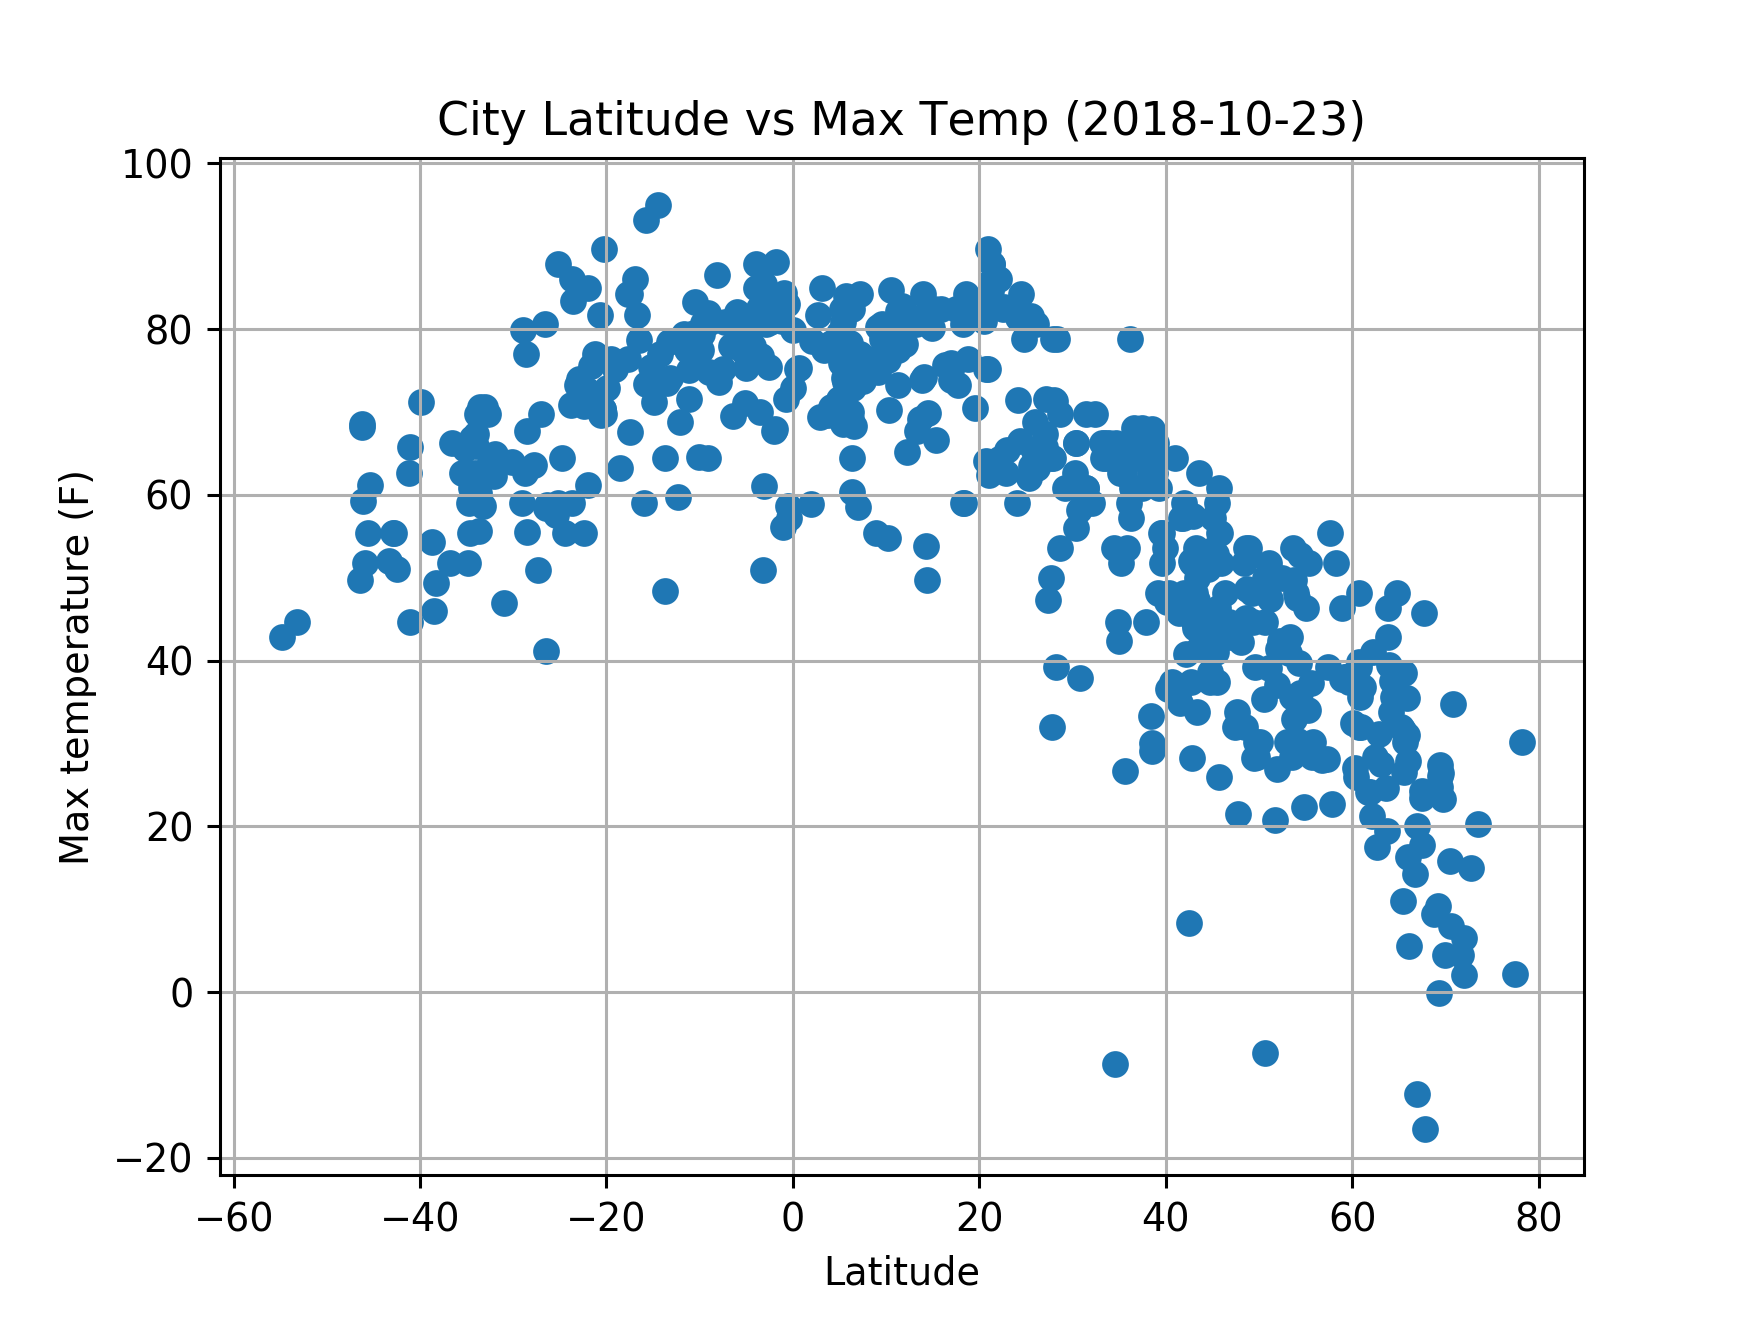

In [15]:
plt.figure()
plt.scatter(data_df['Lat'],data_df['Max_temp'])
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max temperature (F)')
plt.title(f"City Latitude vs Max Temp ({data_df.iloc[0]['Date']})")
plt.savefig('LatvsTemp.png')

# Latitude vs. Humidity Plot

<IPython.core.display.Javascript object>


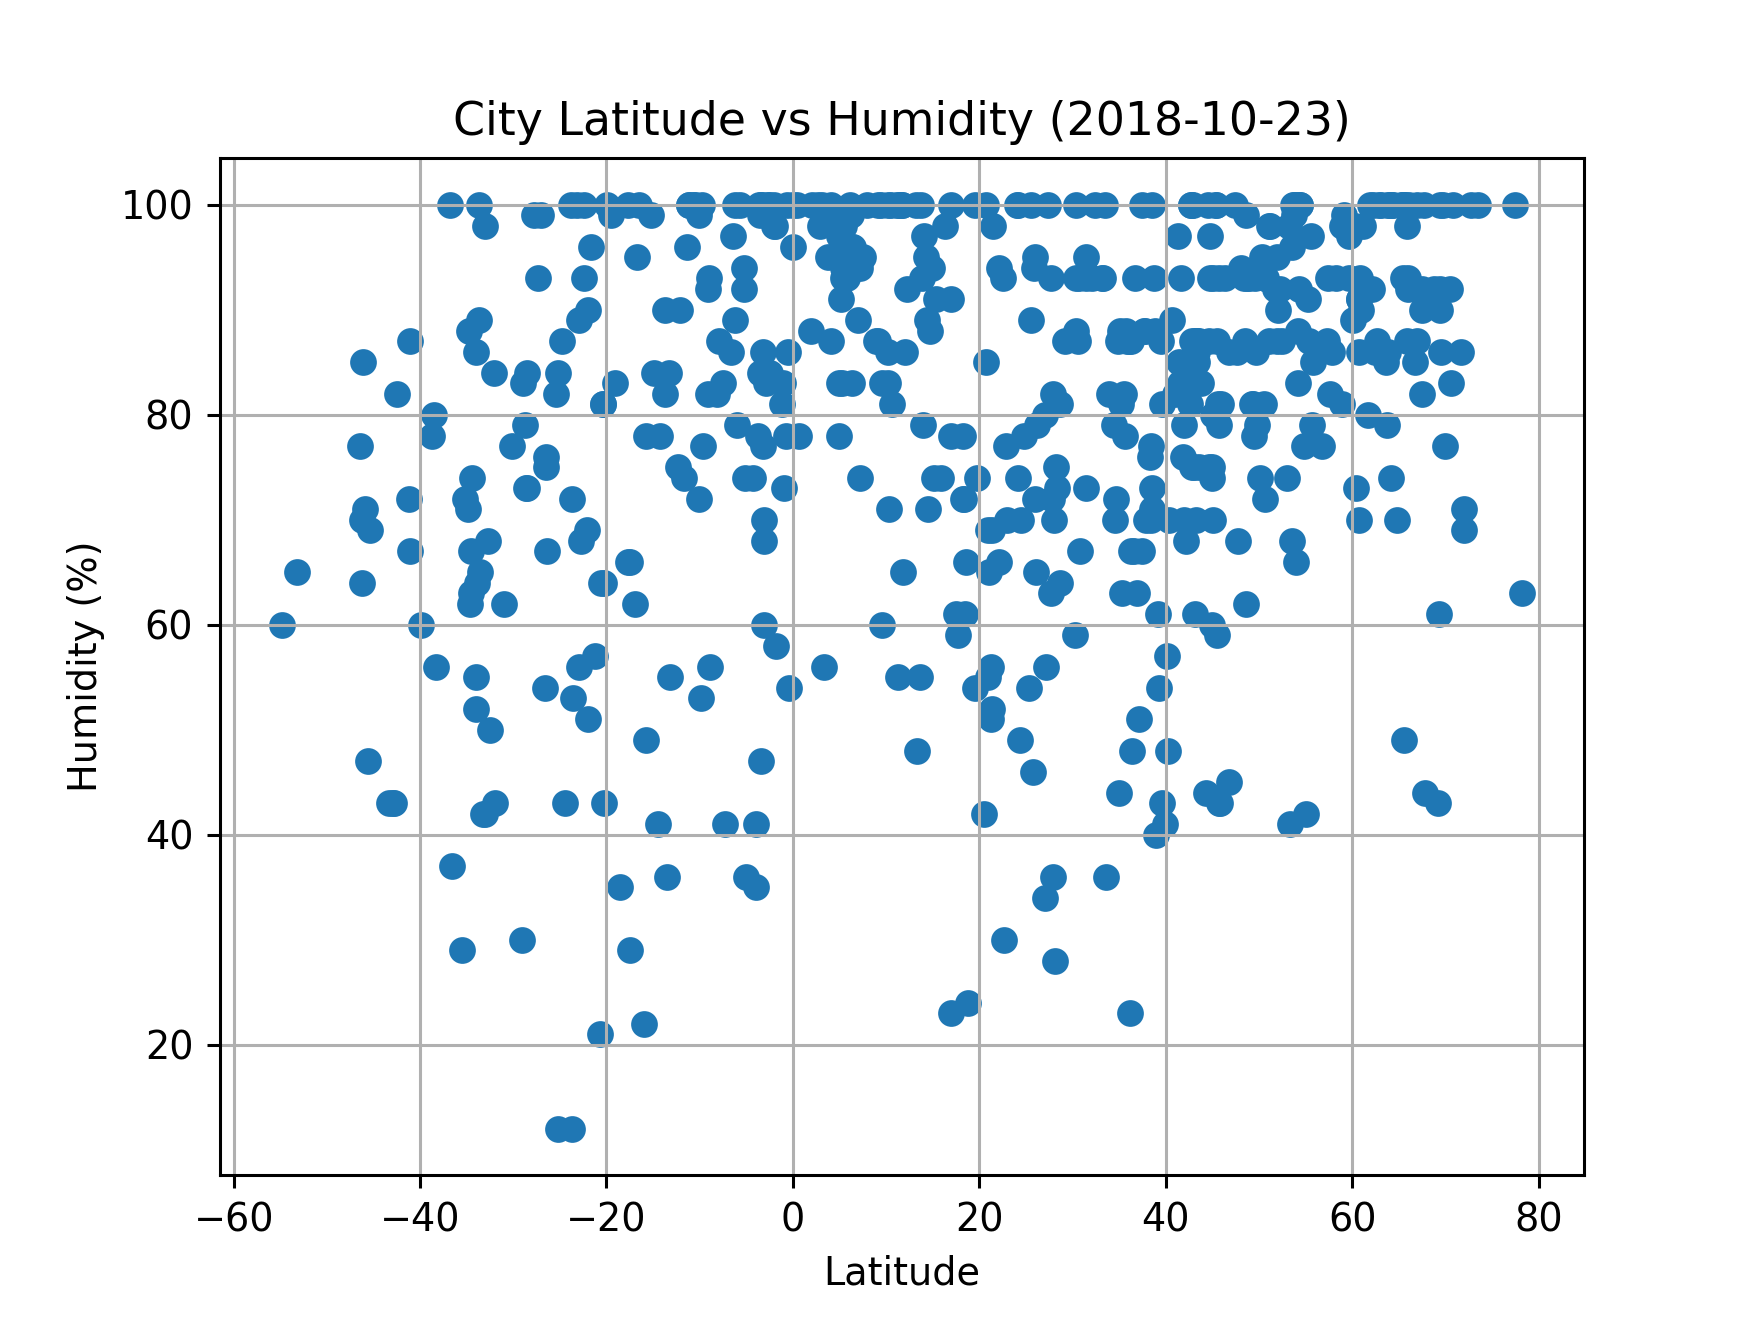

In [16]:
plt.figure()
plt.scatter(data_df['Lat'],data_df['Humidity'])
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"City Latitude vs Humidity ({data_df.iloc[0]['Date']})")
plt.savefig('LatvsHumidity.png')

# Latitude vs. Cloudiness Plot

<IPython.core.display.Javascript object>


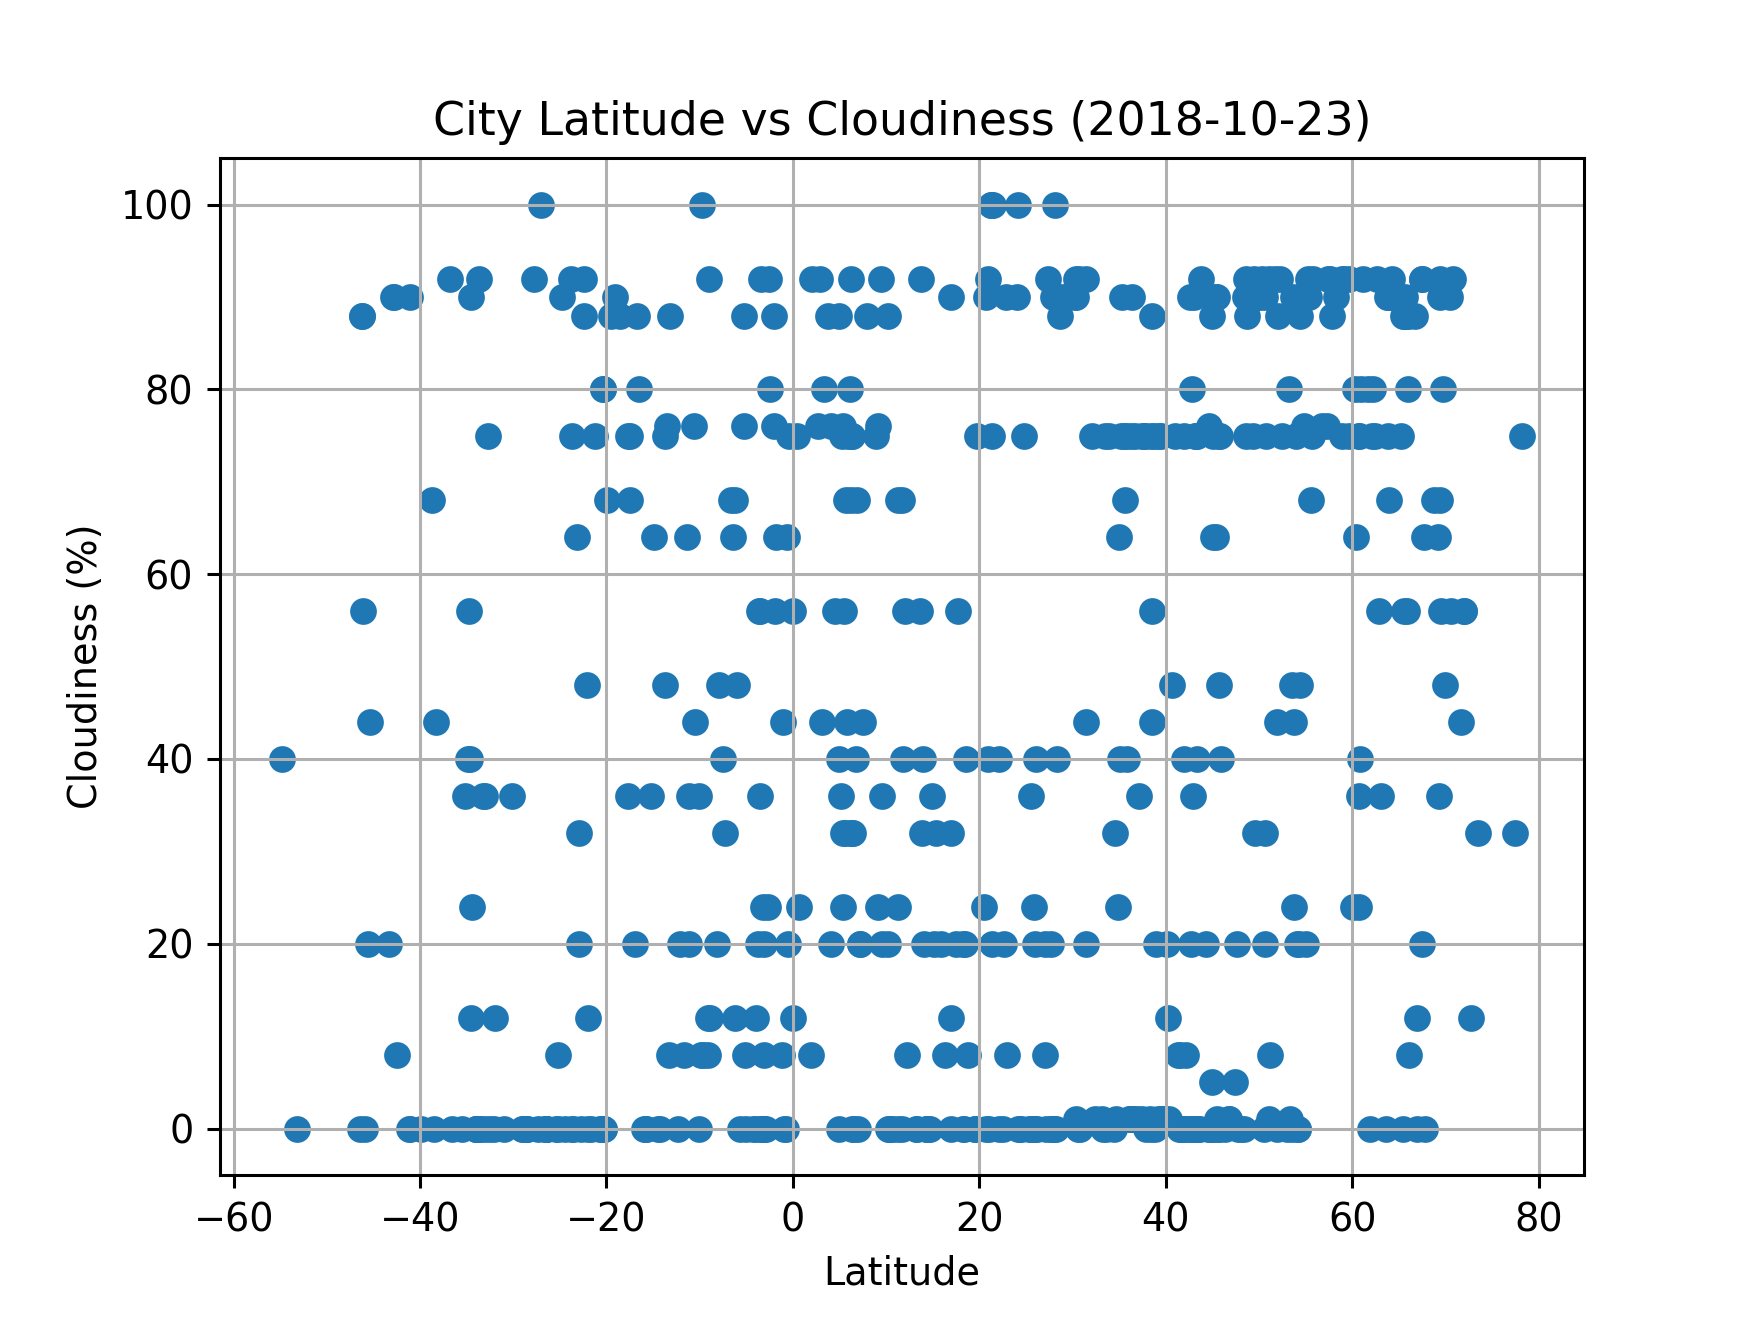

In [17]:
plt.figure()
plt.scatter(data_df['Lat'],data_df['Cloudiness'])
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"City Latitude vs Cloudiness ({data_df.iloc[0]['Date']})")
plt.savefig('LatvsCloudiness.png')

# Latitude vs. Wind Speed Plot

<IPython.core.display.Javascript object>


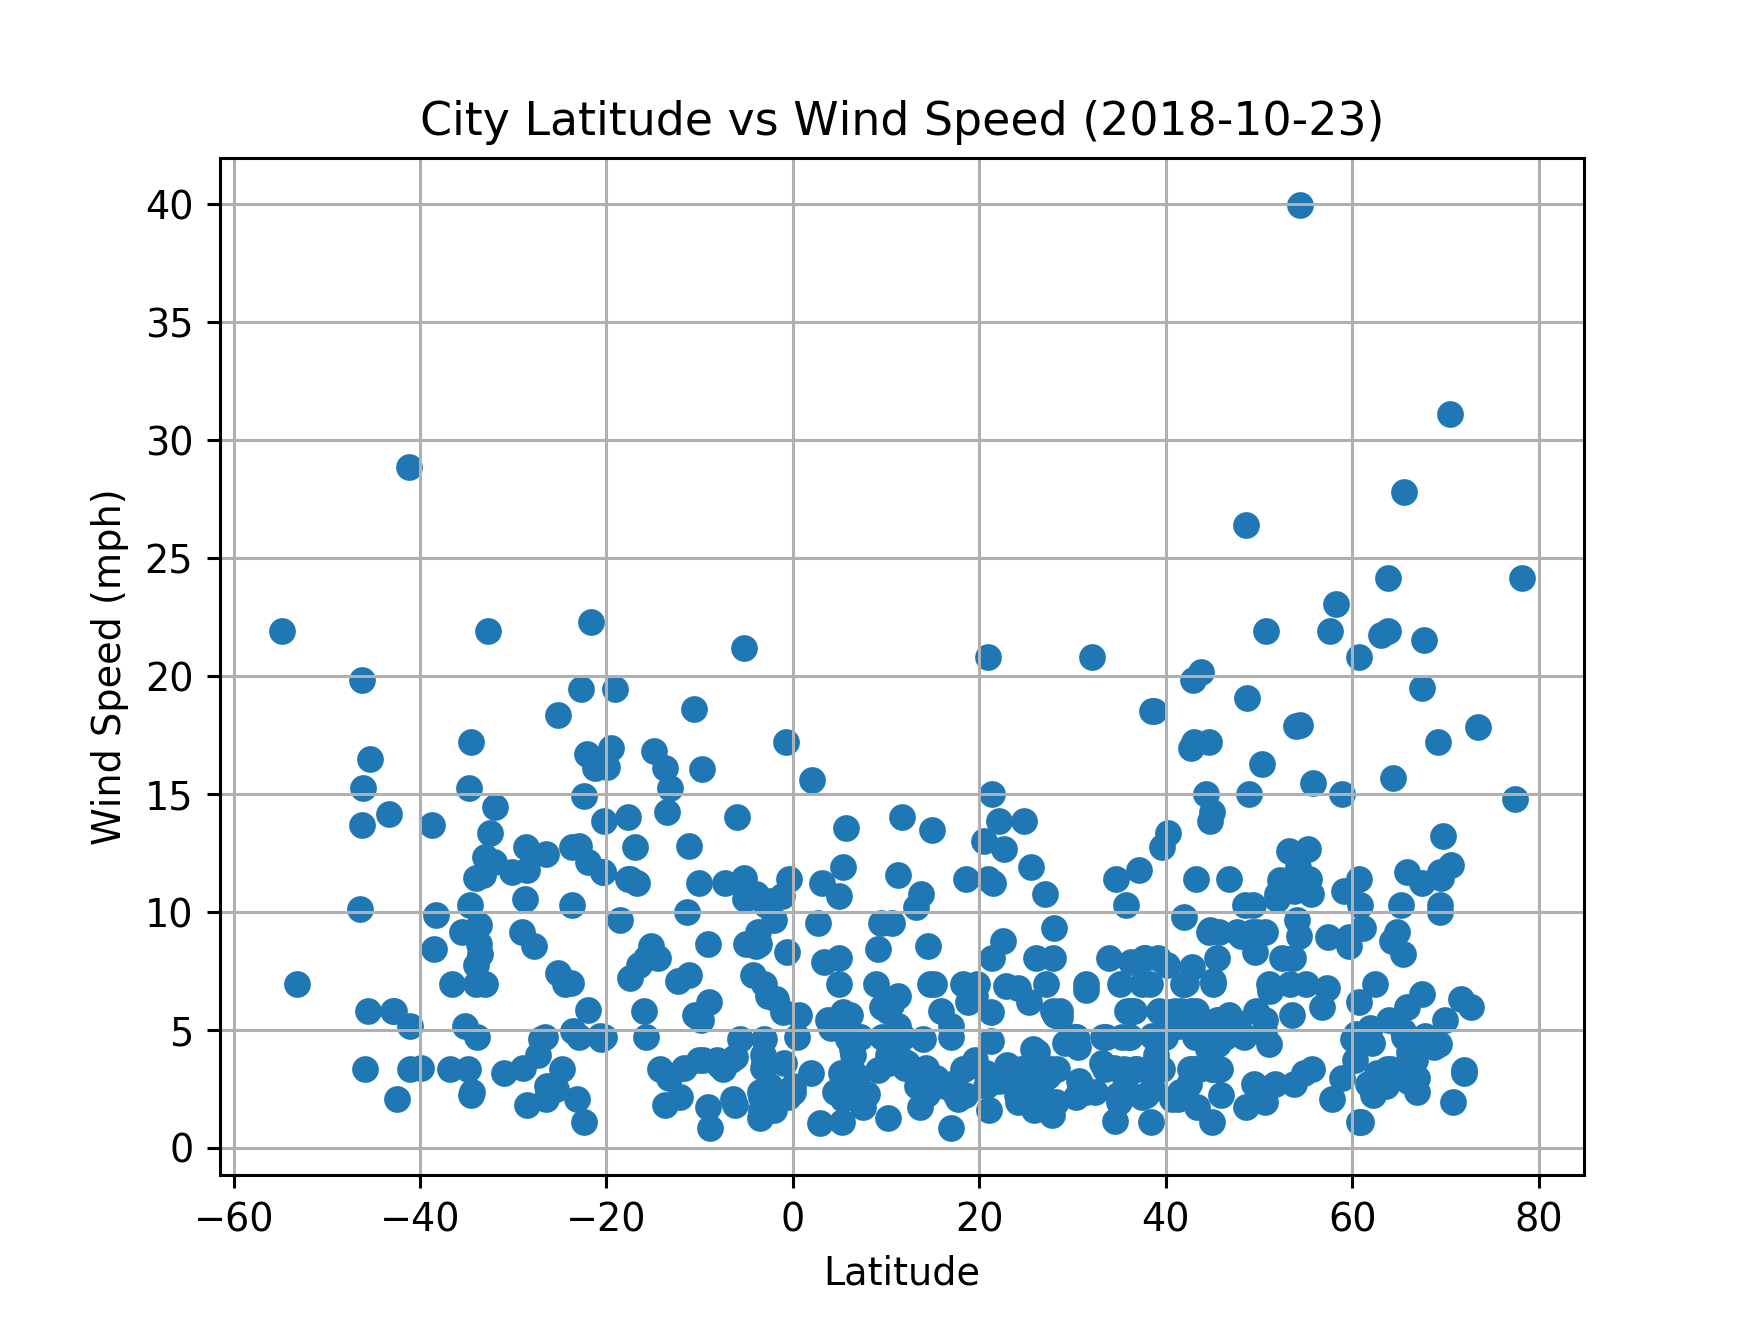

In [18]:
plt.figure()
plt.scatter(data_df['Lat'],data_df['Wind_speed'])
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f"City Latitude vs Wind Speed ({data_df.iloc[0]['Date']})")
plt.savefig('LatvsWindSpeed.png')